# Markowitz均值-方差模型的实现

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [3]:
stock = pd.read_table('019/stock.txt',sep='\t',index_col = 'Trddt')
stock.index = pd.to_datetime(stock.index)  #把索引的类型转变为datetime

挑选出白云机场,华夏银行,浙能电力,福建高速,生益科技 5支股票作为研究对象

In [4]:
fjgs = stock[stock.Stkcd==600033]['Dretwd']
fjgs.name = 'fjgs'
zndl = stock[stock.Stkcd==600023]['Dretwd']
zndl.name = 'zndl'
sykj = stock[stock.Stkcd==600183]['Dretwd']
sykj.name = 'sykj'
hxyh = stock[stock.Stkcd==600015]['Dretwd']
hxyh.name = 'hxyh'
byjc = stock[stock.Stkcd==600004]['Dretwd']
byjc.name = 'byjc'

In [5]:
returns = pd.concat([byjc,fjgs,hxyh,sykj,zndl],axis=1)
returns.head()

,byjc,fjgs,hxyh,sykj,zndl
Trddt,,,,,
2014-01-02,-0.001439,0.000000,-0.031505,0.002024,0.008876
2014-01-03,-0.008646,0.004673,-0.028916,-0.012121,-0.013196
2014-01-06,-0.018895,-0.023256,-0.023573,-0.026585,0.005944
2014-01-07,-0.007407,0.004762,-0.003812,0.021008,-0.013294
2014-01-08,0.005970,-0.014218,0.021684,-0.014403,0.008982


查看收益率情况

In [6]:
returns = returns.dropna()
#收益率累乘
cumreturns = (1 + returns).cumprod() 

In [7]:
returns.head()

,byjc,fjgs,hxyh,sykj,zndl
Trddt,,,,,
2014-01-02,-0.001439,0.000000,-0.031505,0.002024,0.008876
2014-01-03,-0.008646,0.004673,-0.028916,-0.012121,-0.013196
2014-01-06,-0.018895,-0.023256,-0.023573,-0.026585,0.005944
2014-01-07,-0.007407,0.004762,-0.003812,0.021008,-0.013294
2014-01-08,0.005970,-0.014218,0.021684,-0.014403,0.008982


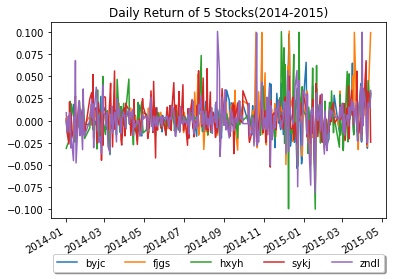

In [8]:
returns.plot()
plt.title('Daily Return of 5 Stocks(2014-2015)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),ncol=5,fancybox=True,shadow=True)

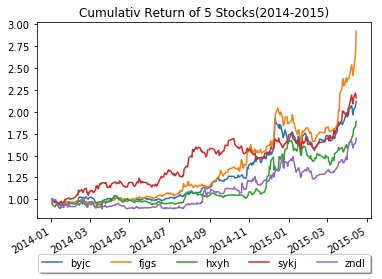

In [9]:
cumreturns.plot()
plt.title('Cumulativ Return of 5 Stocks(2014-2015)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),ncol=5,fancybox=True,shadow=True)

In [10]:
#相关系数矩阵
returns.corr()

,byjc,fjgs,hxyh,sykj,zndl
byjc,1.000000,0.591674,0.327680,0.372088,0.429905
fjgs,0.591674,1.000000,0.282111,0.361442,0.397685
hxyh,0.327680,0.282111,1.000000,0.207656,0.369259
sykj,0.372088,0.361442,0.207656,1.000000,0.302859
zndl,0.429905,0.397685,0.369259,0.302859,1.000000


In [11]:
#协方差矩阵
print(returns.cov())
print()
print(returns.mean())

          byjc      fjgs      hxyh      sykj      zndl
byjc  0.000331  0.000233  0.000131  0.000128  0.000169
fjgs  0.000233  0.000470  0.000134  0.000148  0.000187
hxyh  0.000131  0.000134  0.000479  0.000086  0.000175
sykj  0.000128  0.000148  0.000086  0.000357  0.000124
zndl  0.000169  0.000187  0.000175  0.000124  0.000469

byjc    0.002580
fjgs    0.003683
hxyh    0.002289
sykj    0.002655
zndl    0.001938
dtype: float64


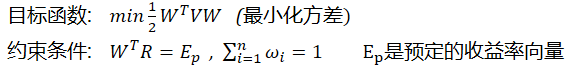

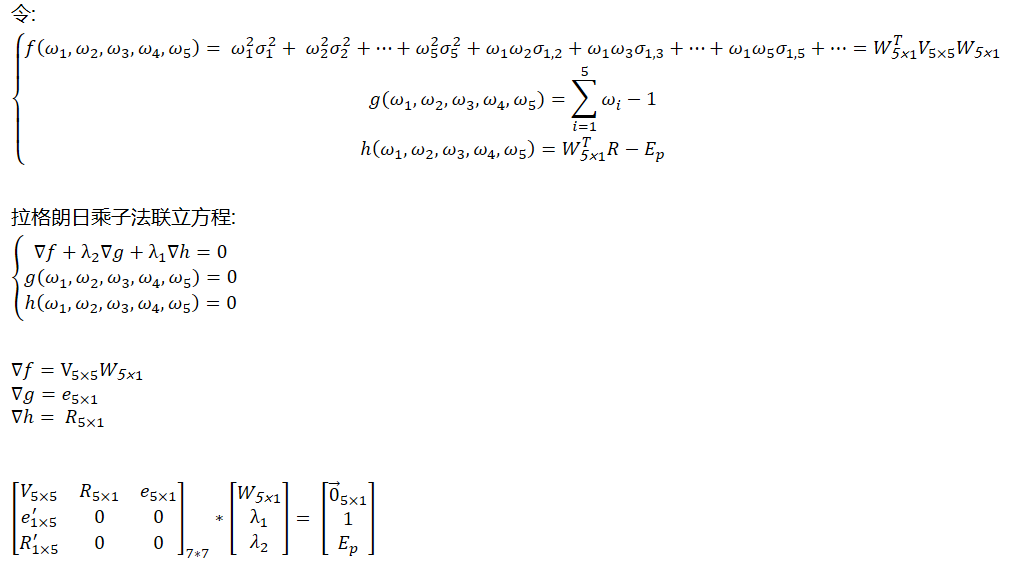


In [12]:
covs = np.array(returns.cov())    #计算协方差矩阵
means = np.array(returns.mean())  #计算每只股票的平均收益率

In [13]:
#查看维度
covs.shape, means.shape

((5, 5), (5,))

In [14]:
means = means.reshape(-1,1)
ones = np.ones((5,1))

In [15]:
#拼接第一行
L1 = np.hstack((covs,means,ones)) 

In [16]:
#拼接第二行
L2 = np.ones((1,5))
L2 = np.append(L2,[0,0])

In [17]:
#拼接第三行
L3 = means.T
L3 = np.append(L3,[0,0])

In [18]:
#将三行拼接成一个矩阵:
L = np.vstack((L1,L2,L3))

In [19]:
#假设目标收益率为5%
y = np.zeros((len(means),1))
y = np.append(y,[1,0.05])

求出 权重W 和 lambda_1 和 lambda_2


In [20]:
result = linalg.solve(L,y)
print(result)

[-1.13092833e+01  3.22009893e+01 -3.37457169e+00  4.49833664e-01
 -1.69669680e+01 -7.64517084e+00  1.92095640e-02]


### 写成类的形式

In [21]:
class MeanVariance:
    
    def __init__(self,returns):
        self.returns = returns
        
    def minVar(self,goalRet):
        covs = np.array(self.returns.cov())
        means = np.array(self.returns.mean())
        means = means.reshape(-1,1)
        ones = np.ones((len(means),1))
        
        L1 = np.hstack((covs,means,ones)) 
        L2 = np.ones((1,len(means)))
        L2 = np.append(L2,[0,0])
        L3 = means.T
        L3 = np.append(L3,[0,0])
        L = np.vstack((L1,L2,L3))
        
        y = np.zeros((len(means),1))
        y = np.append(y,[1,goalRet])
       
        results=linalg.solve(L,y)
        return (np.array([list(self.returns.columns),results[:-2]]))
    
    def frontierCurve(self):
        variances = []
        goals = [x/500000 for x in range(-100,4000)]
        for r in goals:
            var = self.calVar(self.minVar(r)[1,:].astype(np.float))
            variances.append(var)
        plt.plot(variances,goals)
        
    def meanRet(self,fracs):
        return np.dot(self.returns.mean(),fracs)
    
    def calVar(self,fracs):
        #计算投资组合整体方差: W_T*V*W
        return (np.dot(np.dot(fracs,self.returns.cov()),fracs))


In [22]:
minVar = MeanVariance(returns)

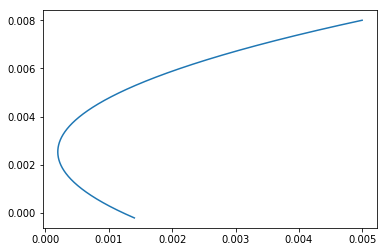

In [23]:
minVar.frontierCurve()

## 检验模型的有效性
选取2014年为训练集和2015年为测试集

In [32]:
train_set = returns['2014']
test_set = returns['2015']

生成最优权重

In [29]:
VarMinimizer = MeanVariance(train_set)
goal_return = 0.003
p_weight = VarMinimizer.minVar(goal_return)
print(p_weight)

[['byjc' 'fjgs' 'hxyh' 'sykj' 'zndl']
 ['-0.10970733137288036' '0.8121632841002371' '0.3474730536307217'
  '0.4301821962925995' '-0.480111202650678']]


用最优权重weight构造2015年5支股票的投资组合

In [52]:
weight = p_weight[1,:].astype(np.float)
test_return = np.dot(test_set,weight)
test_return = pd.DataFrame(test_return,index=test_set.index)
test_cum_return = (1+test_return).cumprod()

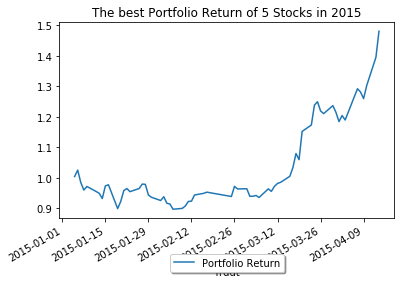

In [60]:
test_cum_return.rename(columns={0:'Portfolio Return'},inplace=True)
test_cum_return.plot()
plt.title('The best Portfolio Return of 5 Stocks in 2015')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),ncol=5,fancybox=True,shadow=True)

与随机生成的权重比较

In [79]:
random_matrix = np.random.uniform(0,1,(100,5)) #生成100个1*5 的向量, 范围在0~1
sum_matrix = random_matrix.sum(axis=1).reshape(-1,1)
weight_matrix = random_matrix/sum_matrix #生成权重

In [82]:
weight_matrix.shape, test_set.shape

((100, 5), (66, 5))

In [86]:
random_returns = np.dot(test_set,weight_matrix.T)
random_cum_returns = (1+random_returns).cumprod(axis=0)

In [94]:
pd_returns = pd.DataFrame(random_cum_returns,index=test_set.index )

In [105]:
pd_returns['portfolio_return'] = test_cum_return.values

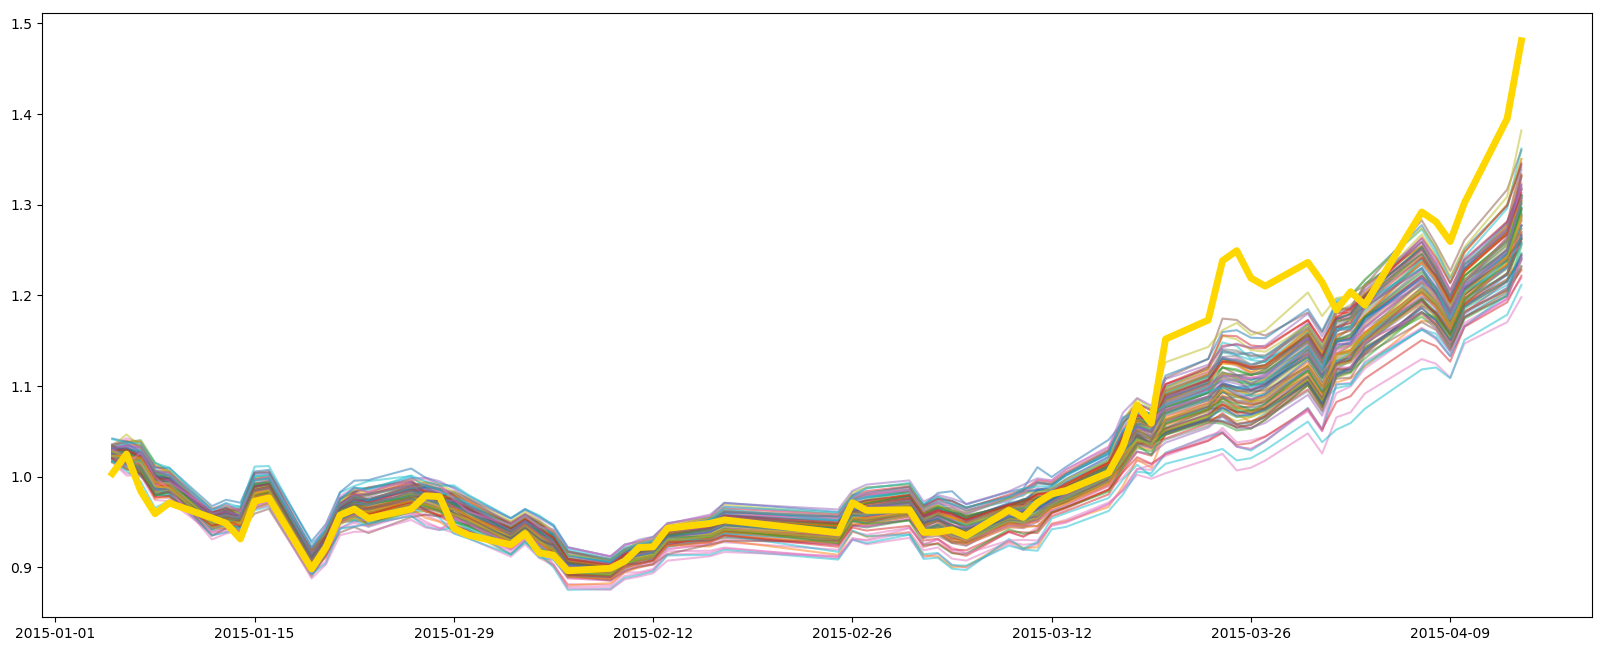

In [106]:
plt.figure(figsize=(20,8),dpi=100)

x = pd_returns.index
for i in range(100):
    y = pd_returns.iloc[:,i]
    plt.plot(x,y,alpha=0.5)
best_return = pd_returns['portfolio_return'] 
plt.plot(x,best_return,linewidth=5,color='gold')

**金色的为最优投资组合的收益曲线**可以看出在后半段,最优投资组合确实更胜一筹

## 用蒙特卡洛模拟观察有效前沿  

In [111]:
import scipy.stats as scs

In [172]:
random_matrix = np.random.uniform(0,1,(4000,5)) #生成100个1*5 的向量, 范围在0~1
sum_matrix = random_matrix.sum(axis=1).reshape(-1,1)
weight_matrix = random_matrix/sum_matrix #生成权重 (4000,5)

In [173]:
Means = returns.mean().values.reshape(-1,1)  #(5,1)
port_returns = np.dot(weight_matrix,Means)

In [174]:
port_variance = []
covMatrix = returns.cov().values
for i in range(4000):
    var = np.dot(np.dot(weight_matrix[i,:],covMatrix),weight_matrix[i,:].T)
    port_variance.append(var)
port_variance = np.array(port_variance).reshape(-1,1)

In [175]:
risk_free = 0.0024

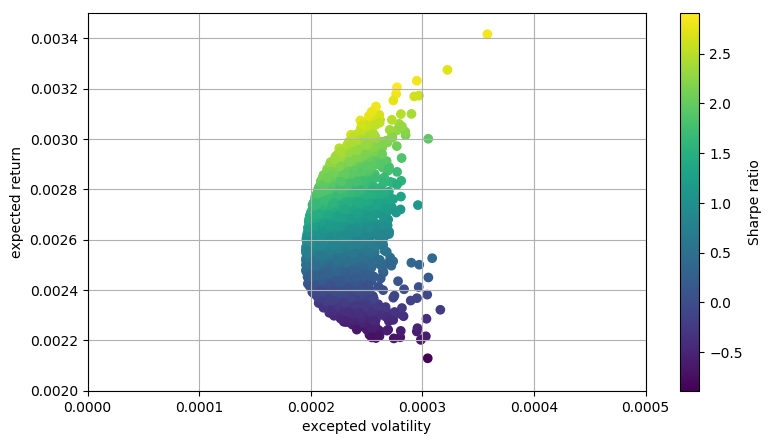

In [187]:
plt.figure(figsize=(9,5),dpi=100)
plt.scatter(port_variance,port_returns,c=(port_returns-risk_free)/port_variance,marker = 'o' )
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')
plt.xlim((0, 0.0005)) 
plt.ylim((0.002, 0.0035))
plt.colorbar(label = 'Sharpe ratio')